In [2]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

[1.746]
[-1.746]


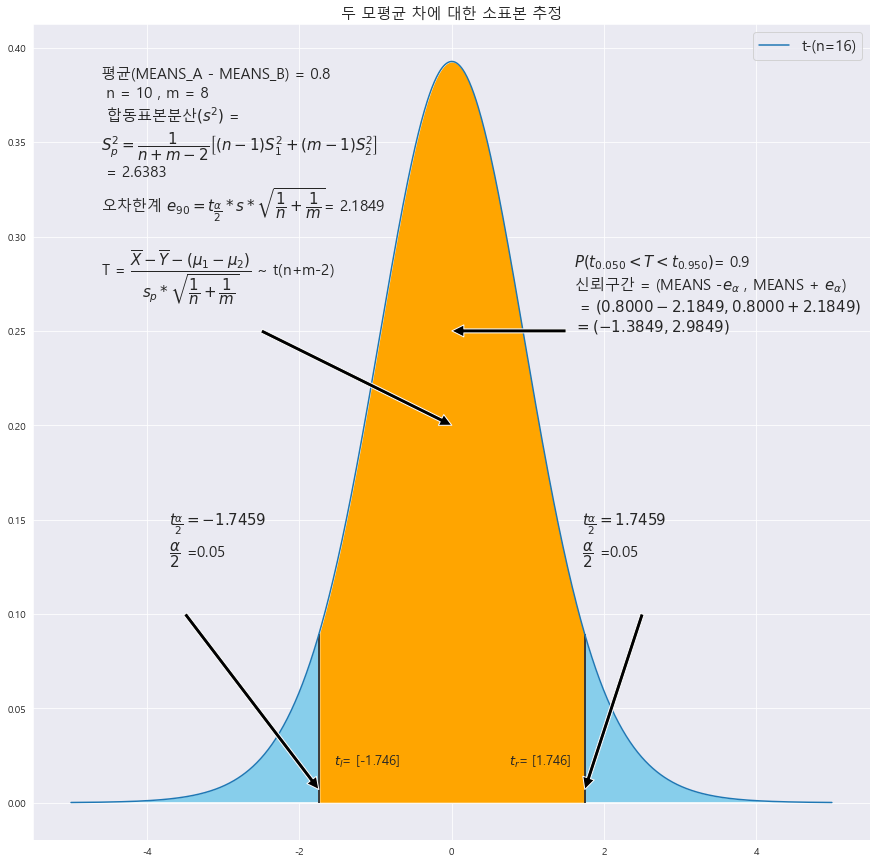

In [3]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,15))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


# A = [2360, 2330 , 2350 , 2430 , 2380 , 2360]
# B = [2250 , 2230 , 2300 , 2240 , 2260 , 2340]



MEANS_A = 25.5
# print(MEANS_A)
STDS_A = 2.1
# print(STDS_A**2)
MEANS_B =  24.7
# print(MEANS_B)
STDS_B = 3.2
# print(STDS_B**2)
n_A = 10 #표본개수
n_B = 8
dof = n_A+n_B-2
dof_2 = [dof] #자유도c

MEANS = round(MEANS_A - MEANS_B,4)
STDS = round(math.sqrt(( (n_A-1) * (STDS_A**2) + (n_B-1) * (STDS_B**2))/(dof)),4) # 합동표본표준편차

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 90 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS * math.sqrt((1/n_A + 1/n_B))),4)


ax.set_title('두 모평균 차에 대한 소표본 추정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=t_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .28, f'평균(MEANS_A - MEANS_B) = {MEANS}\n'  +f' n = {n_A} , m = {n_B}  \n 합동표본분산' +r'$(s^{2})$ = ' + '\n' + r'$S _{p}^{2}=\dfrac{1}{n+m-2}\left[ \left( n-1\right) S _{1}^{2}+\left( m-1\right) S_{2}^{2}\right]$' + f'\n = {STDS}\n' +r'오차한계 $e_{%d} = t_{\dfrac{\alpha}{2}}*{s}*\sqrt{\dfrac{1}{n} + \dfrac{1}{m}}$' % ((1-  trust*2)*100 ) +f'= {E} \n\n' + r'T = $\dfrac{\overline{X} - \overline{Y} - ({\mu}_{1} - {\mu}_{2})}{s_{p} * \sqrt{\dfrac{1}{n} + \dfrac{1}{m}}}$ ~ t(n+m-2)'  ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



# t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)
#
# print(t_1)
# t_1 = abs(t_1)
# area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
# ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
# ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
# ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
# annotate_len = stats.t(dof_2).pdf(t_1) /2
# plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)
#
# mo = '모평균'
#
# ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[2.16]
[-2.16]


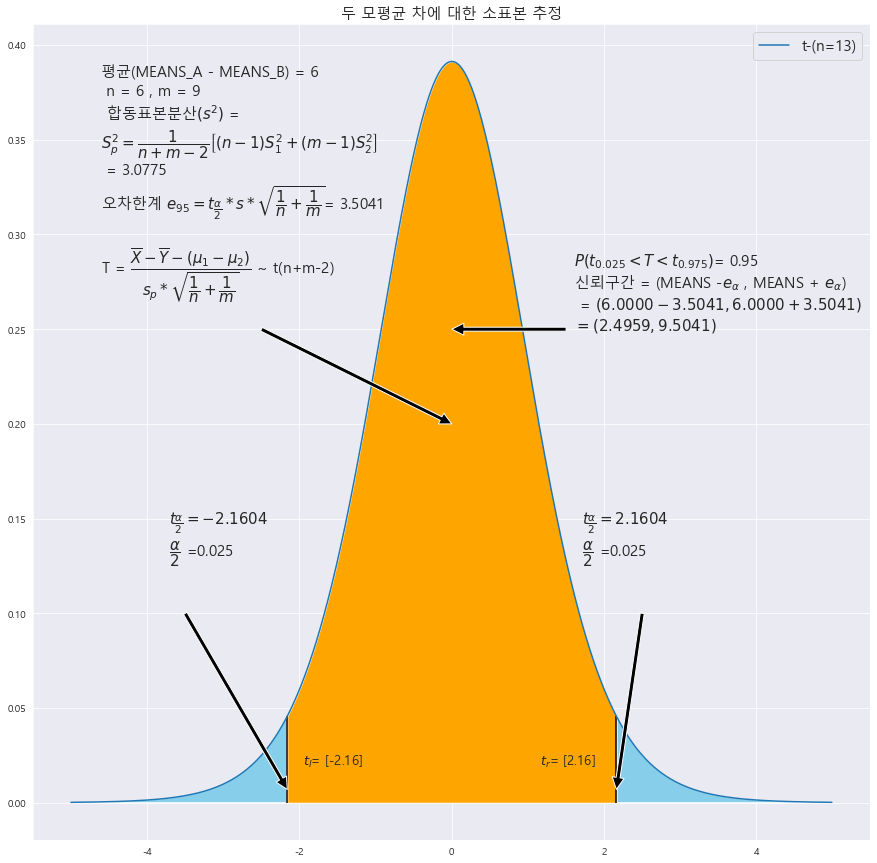

In [4]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,15))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


# A = [2360, 2330 , 2350 , 2430 , 2380 , 2360]
# B = [2250 , 2230 , 2300 , 2240 , 2260 , 2340]



MEANS_A = 141
# print(MEANS_A)
STDS_A = 3.6
# print(STDS_A**2)
MEANS_B =  135
# print(MEANS_B)
STDS_B = 2.7
# print(STDS_B**2)
n_A = 6 #표본개수
n_B = 9
dof = n_A+n_B-2
dof_2 = [dof] #자유도c

MEANS = round(MEANS_A - MEANS_B,4)
STDS = round(math.sqrt(( (n_A-1) * (STDS_A**2) + (n_B-1) * (STDS_B**2))/(dof)),4) # 합동표본표준편차

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS * math.sqrt((1/n_A + 1/n_B))),4)


ax.set_title('두 모평균 차에 대한 소표본 추정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=t_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .28, f'평균(MEANS_A - MEANS_B) = {MEANS}\n'  +f' n = {n_A} , m = {n_B}  \n 합동표본분산' +r'$(s^{2})$ = ' + '\n' + r'$S _{p}^{2}=\dfrac{1}{n+m-2}\left[ \left( n-1\right) S _{1}^{2}+\left( m-1\right) S_{2}^{2}\right]$' + f'\n = {STDS}\n' +r'오차한계 $e_{%d} = t_{\dfrac{\alpha}{2}}*{s}*\sqrt{\dfrac{1}{n} + \dfrac{1}{m}}$' % ((1-  trust*2)*100 ) +f'= {E} \n\n' + r'T = $\dfrac{\overline{X} - \overline{Y} - ({\mu}_{1} - {\mu}_{2})}{s_{p} * \sqrt{\dfrac{1}{n} + \dfrac{1}{m}}}$ ~ t(n+m-2)'  ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



# t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)
#
# print(t_1)
# t_1 = abs(t_1)
# area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
# ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
# ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
# ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
#
# annotate_len = stats.t(dof_2).pdf(t_1) /2
# plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)
#
# mo = '모평균'
#
# ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[2.074]
[-2.074]
-1.75


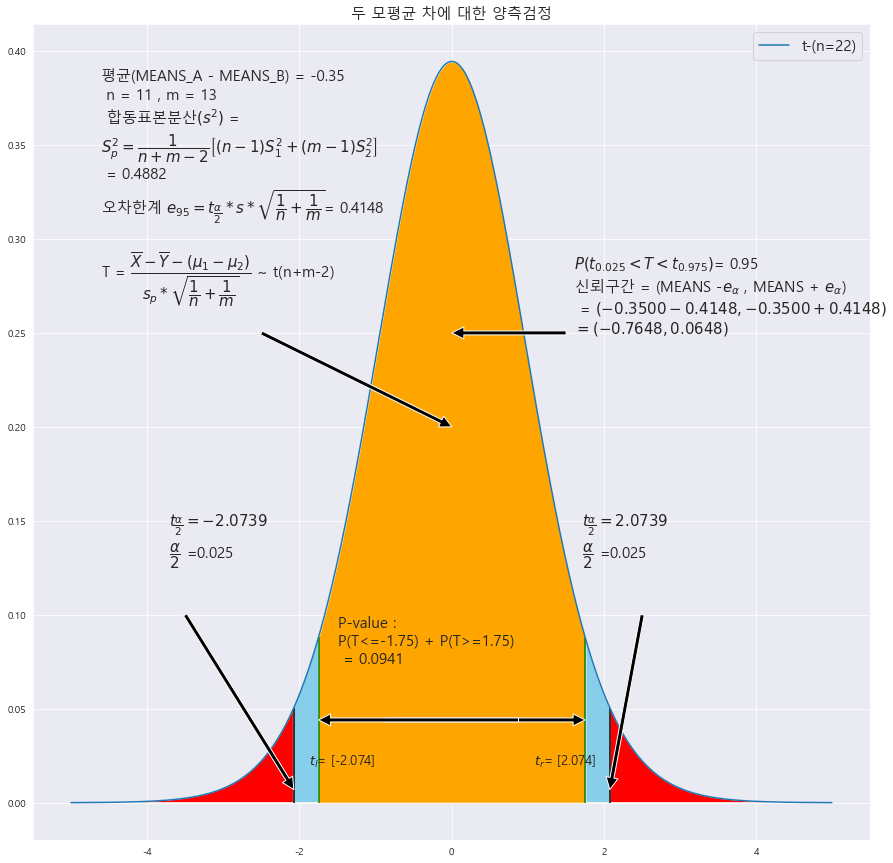

In [5]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,15))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


# A = [2360, 2330 , 2350 , 2430 , 2380 , 2360]
# B = [2250 , 2230 , 2300 , 2240 , 2260 , 2340]



MEANS_A = 7.46
# print(MEANS_A)
STDS_A = 0.52
# print(STDS_A**2)
MEANS_B =  7.81
# print(MEANS_B)
STDS_B = 0.46
# print(STDS_B**2)
n_A = 11 #표본개수
n_B = 13
dof = n_A+n_B-2
dof_2 = [dof] #자유도c

MEANS = round(MEANS_A - MEANS_B,4)
STDS = round(math.sqrt(( (n_A-1) * (STDS_A**2) + (n_B-1) * (STDS_B**2))/(dof)),4) # 합동표본표준편차

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS * math.sqrt((1/n_A + 1/n_B))),4)


ax.set_title('두 모평균 차에 대한 양측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=t_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .28, f'평균(MEANS_A - MEANS_B) = {MEANS}\n'  +f' n = {n_A} , m = {n_B}  \n 합동표본분산' +r'$(s^{2})$ = ' + '\n' + r'$S _{p}^{2}=\dfrac{1}{n+m-2}\left[ \left( n-1\right) S _{1}^{2}+\left( m-1\right) S_{2}^{2}\right]$' + f'\n = {STDS}\n' +r'오차한계 $e_{%d} = t_{\dfrac{\alpha}{2}}*{s}*\sqrt{\dfrac{1}{n} + \dfrac{1}{m}}$' % ((1-  trust*2)*100 ) +f'= {E} \n\n' + r'T = $\dfrac{\overline{X} - \overline{Y} - ({\mu}_{1} - {\mu}_{2})}{s_{p} * \sqrt{\dfrac{1}{n} + \dfrac{1}{m}}}$ ~ t(n+m-2)'  ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS )/ (STDS  *math.sqrt((1/n_A) + (1/n_B))),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[2.763]
[-2.763]
1.7151


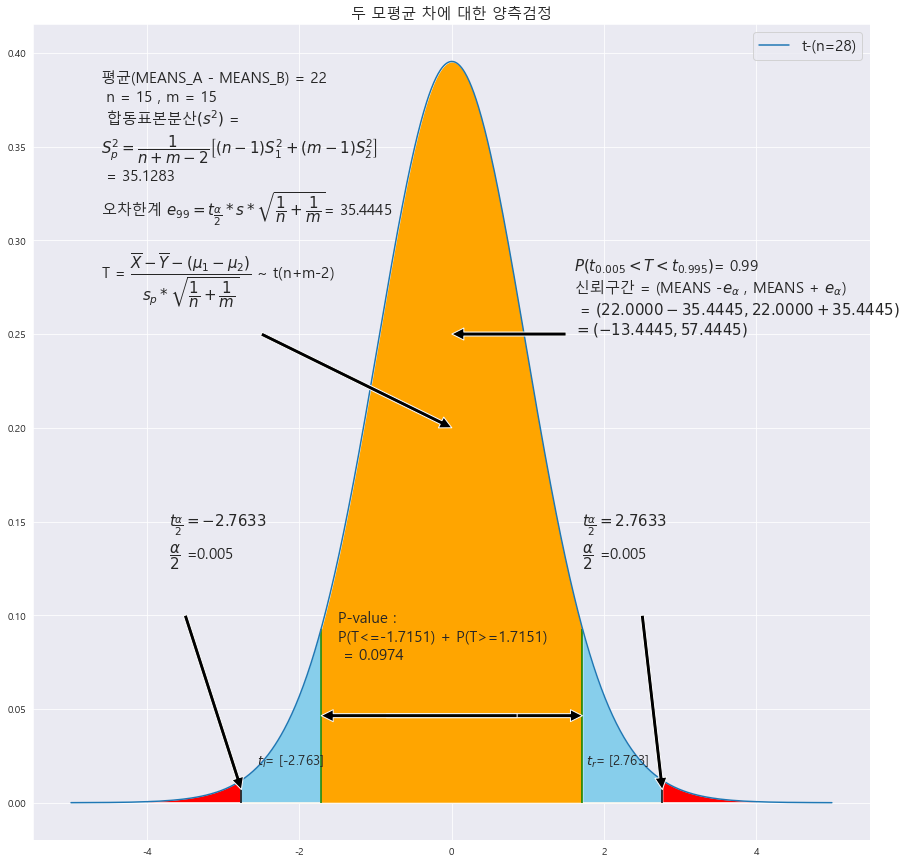

In [6]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,15))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


# A = [2360, 2330 , 2350 , 2430 , 2380 , 2360]
# B = [2250 , 2230 , 2300 , 2240 , 2260 , 2340]



MEANS_A = 1687
# print(MEANS_A)
STDS_A = 32
# print(STDS_A**2)
MEANS_B =  1665
# print(MEANS_B)
STDS_B = 38
# print(STDS_B**2)
n_A = 15 #표본개수
n_B = 15
dof = n_A+n_B-2
dof_2 = [dof] #자유도c

MEANS = round(MEANS_A - MEANS_B,4)
STDS = round(math.sqrt(( (n_A-1) * (STDS_A**2) + (n_B-1) * (STDS_B**2))/(dof)),4) # 합동표본표준편차

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 99 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS * math.sqrt((1/n_A + 1/n_B))),4)


ax.set_title('두 모평균 차에 대한 양측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=t_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .28, f'평균(MEANS_A - MEANS_B) = {MEANS}\n'  +f' n = {n_A} , m = {n_B}  \n 합동표본분산' +r'$(s^{2})$ = ' + '\n' + r'$S _{p}^{2}=\dfrac{1}{n+m-2}\left[ \left( n-1\right) S _{1}^{2}+\left( m-1\right) S_{2}^{2}\right]$' + f'\n = {STDS}\n' +r'오차한계 $e_{%d} = t_{\dfrac{\alpha}{2}}*{s}*\sqrt{\dfrac{1}{n} + \dfrac{1}{m}}$' % ((1-  trust*2)*100 ) +f'= {E} \n\n' + r'T = $\dfrac{\overline{X} - \overline{Y} - ({\mu}_{1} - {\mu}_{2})}{s_{p} * \sqrt{\dfrac{1}{n} + \dfrac{1}{m}}}$ ~ t(n+m-2)'  ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS )/ (STDS  *math.sqrt((1/n_A) + (1/n_B))),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[1.701]
[-1.701]
1.7151


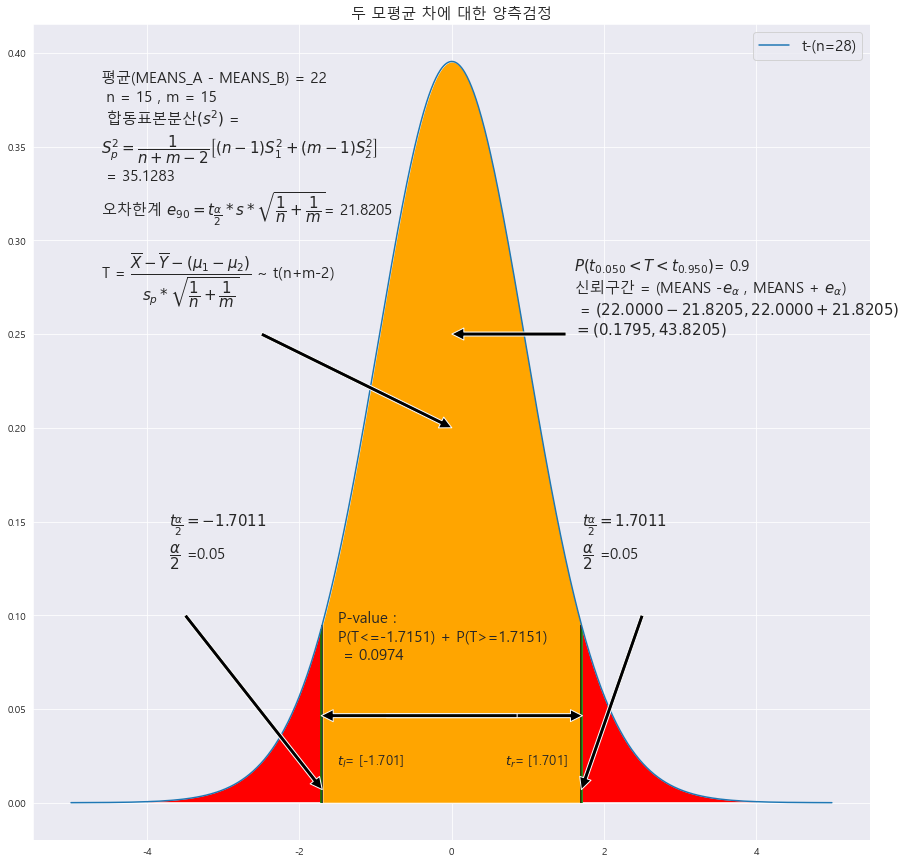

In [7]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,15))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


# A = [2360, 2330 , 2350 , 2430 , 2380 , 2360]
# B = [2250 , 2230 , 2300 , 2240 , 2260 , 2340]



MEANS_A = 1687
# print(MEANS_A)
STDS_A = 32
# print(STDS_A**2)
MEANS_B =  1665
# print(MEANS_B)
STDS_B = 38
# print(STDS_B**2)
n_A = 15 #표본개수
n_B = 15
dof = n_A+n_B-2
dof_2 = [dof] #자유도c

MEANS = round(MEANS_A - MEANS_B,4)
STDS = round(math.sqrt(( (n_A-1) * (STDS_A**2) + (n_B-1) * (STDS_B**2))/(dof)),4) # 합동표본표준편차

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 90 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS * math.sqrt((1/n_A + 1/n_B))),4)


ax.set_title('두 모평균 차에 대한 양측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=t_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .28, f'평균(MEANS_A - MEANS_B) = {MEANS}\n'  +f' n = {n_A} , m = {n_B}  \n 합동표본분산' +r'$(s^{2})$ = ' + '\n' + r'$S _{p}^{2}=\dfrac{1}{n+m-2}\left[ \left( n-1\right) S _{1}^{2}+\left( m-1\right) S_{2}^{2}\right]$' + f'\n = {STDS}\n' +r'오차한계 $e_{%d} = t_{\dfrac{\alpha}{2}}*{s}*\sqrt{\dfrac{1}{n} + \dfrac{1}{m}}$' % ((1-  trust*2)*100 ) +f'= {E} \n\n' + r'T = $\dfrac{\overline{X} - \overline{Y} - ({\mu}_{1} - {\mu}_{2})}{s_{p} * \sqrt{\dfrac{1}{n} + \dfrac{1}{m}}}$ ~ t(n+m-2)'  ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS )/ (STDS  *math.sqrt((1/n_A) + (1/n_B))),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[1.703]
[-1.703]
1.5238


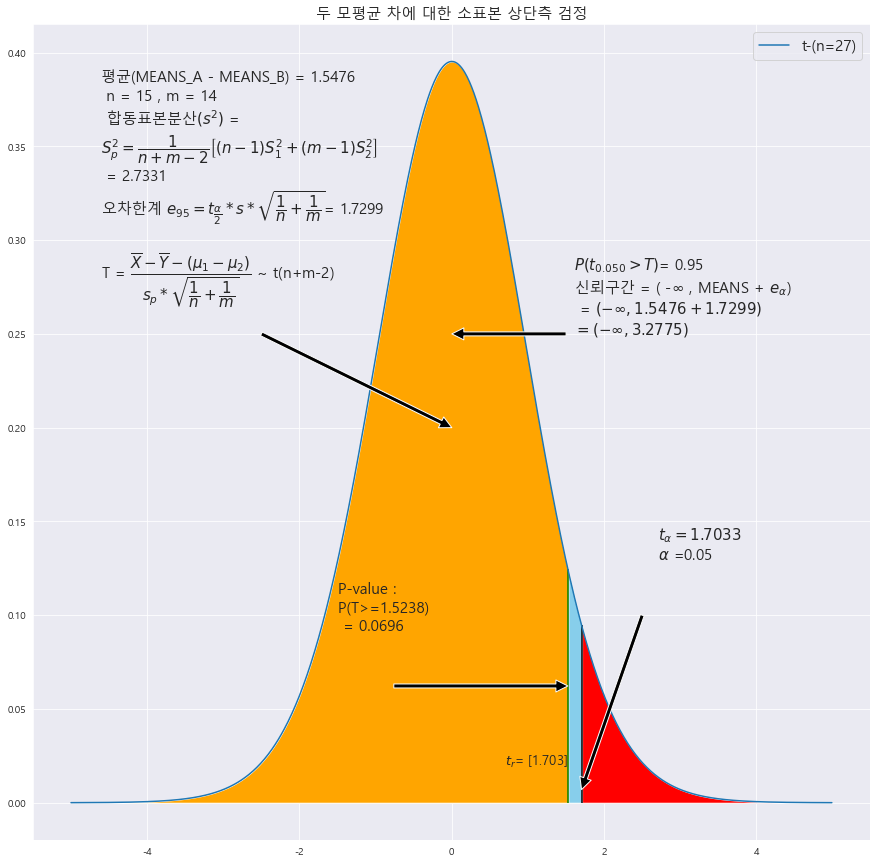

In [36]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,15))

A = "6 9 6 5 2 8 8 7 5 3 1 9 6 4 1"
B = "5 6 0 2 6 6 9 1 2 4 7 0 2 3"
A = list(map(int,A.split(' ')))
B = list(map(int, B.split(' ')))



MEANS_A = np.mean(A)
# print(MEANS_A)
STDS_A = np.std(A , ddof =1 )
# print(STDS_A**2)
MEANS_B =  np.mean(B)
# print(MEANS_B)
STDS_B = np.std(B , ddof=1)
# print(STDS_B**2)
n_A = len(A) #표본개수
n_B = len(B)
dof = n_A+n_B-2
dof_2 = [dof] #자유도c

MEANS = round(MEANS_A - MEANS_B,4)
STDS = round(math.sqrt(( (n_A-1) * (STDS_A**2) + (n_B-1) * (STDS_B**2))/(dof)),4) # 합동표본표준편차

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS * math.sqrt((1/n_A + 1/n_B))),4)


ax.set_title('두 모평균 차에 대한 소표본 상단측 검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))


ax.text(-4.6 , .28, f'평균(MEANS_A - MEANS_B) = {MEANS}\n'  +f' n = {n_A} , m = {n_B}  \n 합동표본분산' +r'$(s^{2})$ = ' + '\n' + r'$S _{p}^{2}=\dfrac{1}{n+m-2}\left[ \left( n-1\right) S _{1}^{2}+\left( m-1\right) S_{2}^{2}\right]$' + f'\n = {STDS}\n' +r'오차한계 $e_{%d} = t_{\dfrac{\alpha}{2}}*{s}*\sqrt{\dfrac{1}{n} + \dfrac{1}{m}}$' % ((1-  trust)*100 ) +f'= {E} \n\n' + r'T = $\dfrac{\overline{X} - \overline{Y} - ({\mu}_{1} - {\mu}_{2})}{s_{p} * \sqrt{\dfrac{1}{n} + \dfrac{1}{m}}}$ ~ t(n+m-2)'  ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))


ax.text(1.6 , .25, r'$P(t_{%.3f}>T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = ( -$\infty$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $(-\infty, {%.4f} + {%.4f})$' % (MEANS, E )  +f'\n' +r'$ = (-\infty , {%.4f})$' % (MEANS+E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(2.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_r + '\n' +r'${\alpha}$ =' +f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
# ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)

#======



#==================================== 가설 검정 ==========================================



t_1 = round((MEANS)/ (STDS * math.sqrt((1/n_A + 1/n_B))),4)

print(t_1)
t_1 = abs(t_1)
area = round(1- float(scipy.stats.t(dof_2).cdf(t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X>=t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5, annotate_len+0.03 , f'P-value : \nP(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'
#
# ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[1.721]
[-1.721]
1.3782


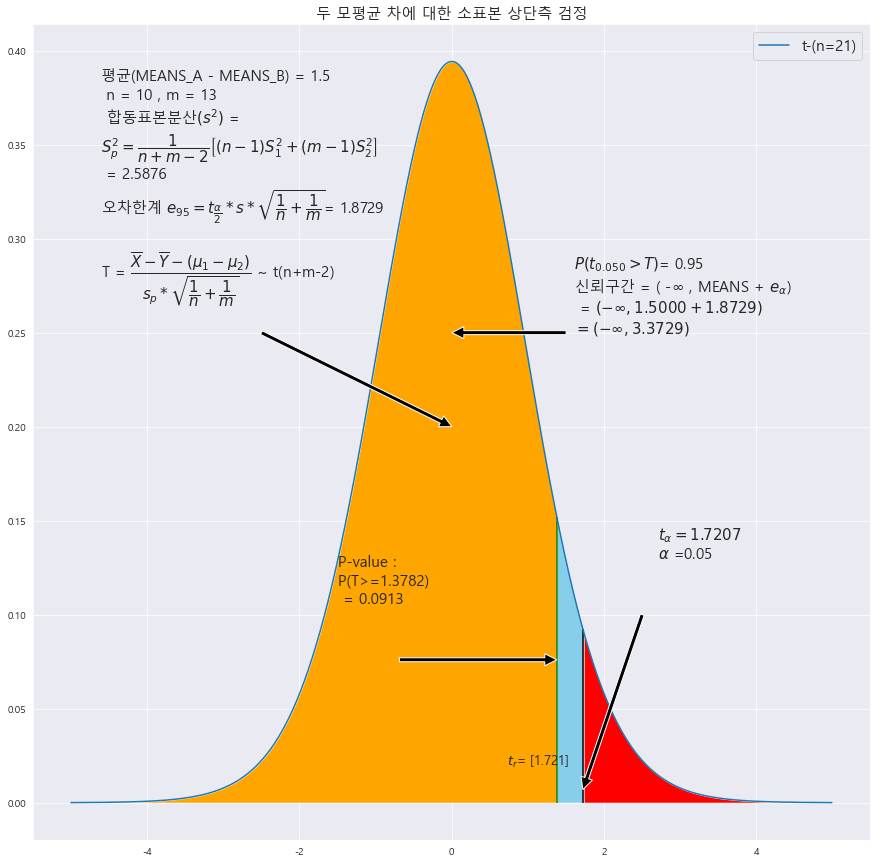

In [8]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,15))


# A = [2360, 2330 , 2350 , 2430 , 2380 , 2360]
# B = [2250 , 2230 , 2300 , 2240 , 2260 , 2340]



MEANS_A = 69.3
# print(MEANS_A)
STDS_A = 2.7
# print(STDS_A**2)
MEANS_B =  67.8
# print(MEANS_B)
STDS_B = 2.5
# print(STDS_B**2)
n_A = 10 #표본개수
n_B = 13
dof = n_A+n_B-2
dof_2 = [dof] #자유도c

MEANS = round(MEANS_A - MEANS_B,4)
STDS = round(math.sqrt(( (n_A-1) * (STDS_A**2) + (n_B-1) * (STDS_B**2))/(dof)),4) # 합동표본표준편차

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS * math.sqrt((1/n_A + 1/n_B))),4)


ax.set_title('두 모평균 차에 대한 소표본 상단측 검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))


ax.text(-4.6 , .28, f'평균(MEANS_A - MEANS_B) = {MEANS}\n'  +f' n = {n_A} , m = {n_B}  \n 합동표본분산' +r'$(s^{2})$ = ' + '\n' + r'$S _{p}^{2}=\dfrac{1}{n+m-2}\left[ \left( n-1\right) S _{1}^{2}+\left( m-1\right) S_{2}^{2}\right]$' + f'\n = {STDS}\n' +r'오차한계 $e_{%d} = t_{\dfrac{\alpha}{2}}*{s}*\sqrt{\dfrac{1}{n} + \dfrac{1}{m}}$' % ((1-  trust)*100 ) +f'= {E} \n\n' + r'T = $\dfrac{\overline{X} - \overline{Y} - ({\mu}_{1} - {\mu}_{2})}{s_{p} * \sqrt{\dfrac{1}{n} + \dfrac{1}{m}}}$ ~ t(n+m-2)'  ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))


ax.text(1.6 , .25, r'$P(t_{%.3f}>T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = ( -$\infty$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $(-\infty, {%.4f} + {%.4f})$' % (MEANS, E )  +f'\n' +r'$ = (-\infty , {%.4f})$' % (MEANS+E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(2.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_r + '\n' +r'${\alpha}$ =' +f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
# ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)

#======



#==================================== 가설 검정 ==========================================



t_1 = round((MEANS)/ (STDS * math.sqrt((1/n_A + 1/n_B))),4)

print(t_1)
t_1 = abs(t_1)
area = round(1- float(scipy.stats.t(dof_2).cdf(t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X>=t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5, annotate_len+0.03 , f'P-value : \nP(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'
#
# ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[1.833]
[-1.833]
-1.1435


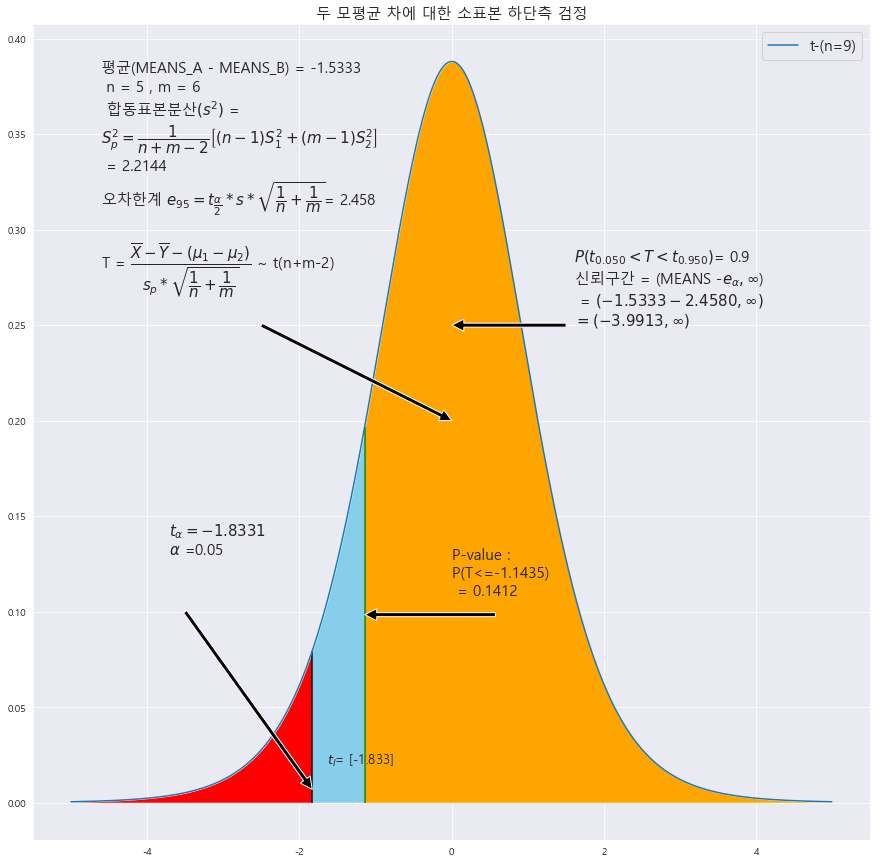

In [9]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,15))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


A = [8, 2 , 7 , 4 , 3]
B = [9 , 6 , 6 , 8, 5 , 4]



MEANS_A = np.mean(A)
# print(MEANS_A)
STDS_A = np.std(A , ddof=1)
# print(STDS_A**2)
MEANS_B =  np.mean(B)
# print(MEANS_B)
STDS_B = np.std(B , ddof=1)
# print(STDS_B**2)
n_A = len(A) #표본개수
n_B = len(B)
dof = n_A+n_B-2
dof_2 = [dof] #자유도c

MEANS = round(MEANS_A - MEANS_B,4)
STDS = round(math.sqrt(( (n_A-1) * (STDS_A**2) + (n_B-1) * (STDS_B**2))/(dof)),4) # 합동표본표준편차

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS * math.sqrt((1/n_A + 1/n_B))),4)


ax.set_title('두 모평균 차에 대한 소표본 하단측 검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X<=t_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .28, f'평균(MEANS_A - MEANS_B) = {MEANS}\n'  +f' n = {n_A} , m = {n_B}  \n 합동표본분산' +r'$(s^{2})$ = ' + '\n' + r'$S _{p}^{2}=\dfrac{1}{n+m-2}\left[ \left( n-1\right) S _{1}^{2}+\left( m-1\right) S_{2}^{2}\right]$' + f'\n = {STDS}\n' +r'오차한계 $e_{%d} = t_{\dfrac{\alpha}{2}}*{s}*\sqrt{\dfrac{1}{n} + \dfrac{1}{m}}$' % ((1-  trust)*100 ) +f'= {E} \n\n' + r'T = $\dfrac{\overline{X} - \overline{Y} - ({\mu}_{1} - {\mu}_{2})}{s_{p} * \sqrt{\dfrac{1}{n} + \dfrac{1}{m}}}$ ~ t(n+m-2)'  ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha} , \infty$)' +f'\n' + r' = $({%.4f} - {%.4f} , \infty)$' % (MEANS, E )  +f'\n' +r'$ = ({%.4f} , \infty)$' % (MEANS-E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\alpha}} = {%.4f}$' % t_r + '\n' +r'${\alpha}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\alpha} = {%.4f}$' % t_l + '\n' +r'${\alpha}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

# ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS)/ (STDS * math.sqrt((1/n_A) + (1/n_B))),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(0, annotate_len+0.01 , f'P-value : \nP(T<={-t_1}) \n = {area}',fontsize=15)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

In [16]:
A = pd.DataFrame({'표본' : [1,2,3,4,5,6,7,8,9,10] , '실험 전' : [5.6 , 7.4 , 5.8 , 10.9 , 8.8 , 9.7 , 6.8 , 7.9 , 8.6 , 5.8] , '실험 후' : [5.3 , 6.9 , 5.5 , 9.7 , 8.4 , 9.8 , 7.0 , 7.3 , 8.2 , 5.5]})

A['실험 전 - 실험 후'] = A.iloc[: , 1]  - A.iloc[: , 2]

A = A.set_index('표본')
A = A.T
A

표본,1,2,3,4,5,6,7,8,9,10
실험 전,5.6,7.4,5.8,10.9,8.8,9.7,6.8,7.9,8.6,5.8
실험 후,5.3,6.9,5.5,9.7,8.4,9.8,7.0,7.3,8.2,5.5
실험 전 - 실험 후,0.3,0.5,0.3,1.2,0.4,-0.1,-0.2,0.6,0.4,0.3


In [30]:
print(np.mean(A.loc['실험 전 - 실험 후']))

print(np.std(A.loc['실험 전 - 실험 후'] , ddof =1))

0.37
0.38311588035185673


[2.262]
[-2.262]
3.054


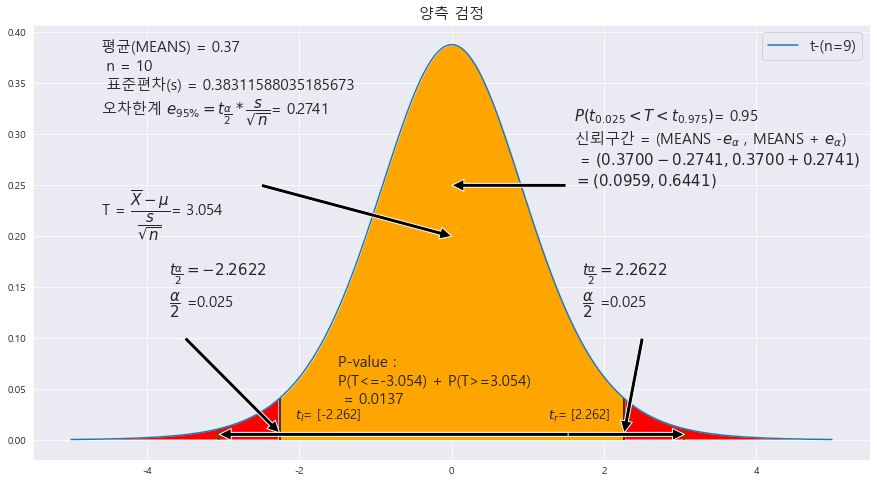

In [33]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))



# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


MEANS = np.mean(A.loc['실험 전 - 실험 후'])
STDS = np.std(A.loc['실험 전 - 실험 후'], ddof=1)
MO_MEAN = 0



n = len(A.loc['실험 전 - 실험 후']) #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4)


ax.set_title('양측 검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{95\% } = t_{\dfrac{\alpha}{2}}*\dfrac{s}{\sqrt{n}}$'+f'= {E}',fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

In [32]:
print(0.37 / (STDS / math.sqrt(10)))

3.2192174654849337


In [34]:
A = pd.DataFrame({'지역' : [1,2,3,4,5,6,7,8] , '바꾸기 전' : [5, 10 , 8 , 9 , 5 , 7 , 6 , 8] , '바꾼 후' : [4, 9 , 8 , 8 , 4 , 8 , 5 , 8]})

A['바꾸기 전 - 바꾼 후'] = A.iloc[: , 1]  - A.iloc[: , 2]

A = A.set_index('지역')
A = A.T
A

지역,1,2,3,4,5,6,7,8
바꾸기 전,5,10,8,9,5,7,6,8
바꾼 후,4,9,8,8,4,8,5,8
바꾸기 전 - 바꾼 후,1,1,0,1,1,-1,1,0


[2.92]
[-2.92]
1.1456


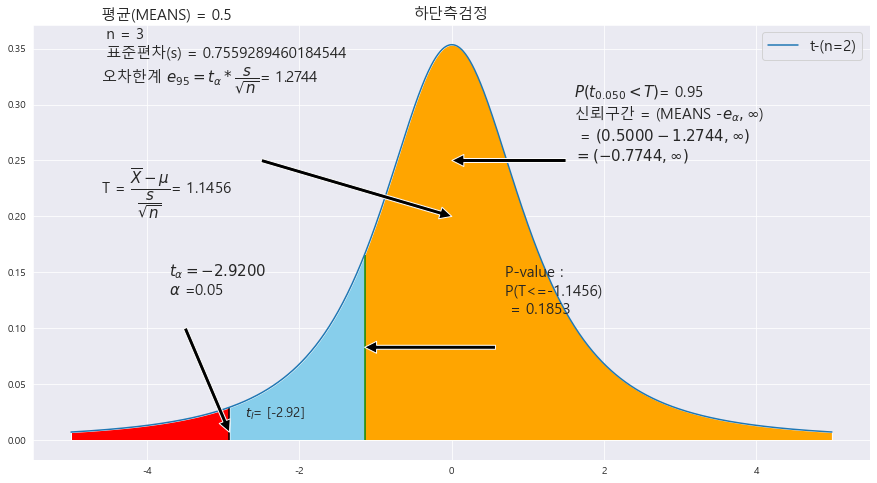

In [35]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


MEANS = np.mean(A.loc['바꾸기 전 - 바꾼 후'])
STDS = np.std(A.loc['바꾸기 전 - 바꾼 후'], ddof=1)
MO_MEAN = 0



n = len(A.loc['바꾸기 전 - 바꾼 후']) #표본개수



n = len(A) #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('하단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=-t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(1- scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha} , \infty$)' +f'\n' + r' = $({%.4f} - {%.4f} , \infty)$' % (MEANS, E)  +f'\n' +r'$ = ({%.4f} , \infty)$' % (MEANS-E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_l + '\n' +r'${\alpha}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

# ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

# ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
# plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(0.7, annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)